# IMPORTS

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#import necessary packages

import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.utils import shuffle
import joblib
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# DATA ANALYSIS AND PREPROCESSING

## Dataset import

In [3]:
# define the path for working directory, read the csv file in a pandas dataframe and print it, to see some examples records

path = "/content/drive/MyDrive/Colab Notebooks/MML/Dry_Bean_Dataset.csv" 
seed = 42

dataset = pd.read_csv(path)
print(dataset.count())
dataset

Area               13611
Perimeter          13611
MajorAxisLength    13611
MinorAxisLength    13611
AspectRation       13611
Eccentricity       13611
ConvexArea         13611
EquivDiameter      13611
Extent             13611
Solidity           13611
roundness          13611
Compactness        13611
ShapeFactor1       13611
ShapeFactor2       13611
ShapeFactor3       13611
ShapeFactor4       13611
Class              13611
dtype: int64


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


## Class Encoding

In [4]:
# check classes names to convert them to integers

dataset['Class'].drop_duplicates()

0           SEKER
2027     BARBUNYA
3349       BOMBAY
3871         CALI
5501        HOROZ
7429         SIRA
10065    DERMASON
Name: Class, dtype: object

In [5]:
# convert classes to integers

dataset['Class'].replace(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
                        [0, 1, 2, 3, 4, 5, 6], inplace=True)
dataset

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,0
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,6
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,6
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,6
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,6


## Duplicates and missing values removal

In [6]:
# remove duplicates and check missing values

dataset = dataset.drop_duplicates()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13543 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13543 non-null  int64  
 1   Perimeter        13543 non-null  float64
 2   MajorAxisLength  13543 non-null  float64
 3   MinorAxisLength  13543 non-null  float64
 4   AspectRation     13543 non-null  float64
 5   Eccentricity     13543 non-null  float64
 6   ConvexArea       13543 non-null  int64  
 7   EquivDiameter    13543 non-null  float64
 8   Extent           13543 non-null  float64
 9   Solidity         13543 non-null  float64
 10  roundness        13543 non-null  float64
 11  Compactness      13543 non-null  float64
 12  ShapeFactor1     13543 non-null  float64
 13  ShapeFactor2     13543 non-null  float64
 14  ShapeFactor3     13543 non-null  float64
 15  ShapeFactor4     13543 non-null  float64
 16  Class            13543 non-null  int64  
dtypes: float64(1

## Attributes collinearity

[Text(0.5, 1.0, 'Correlation Heatmap')]

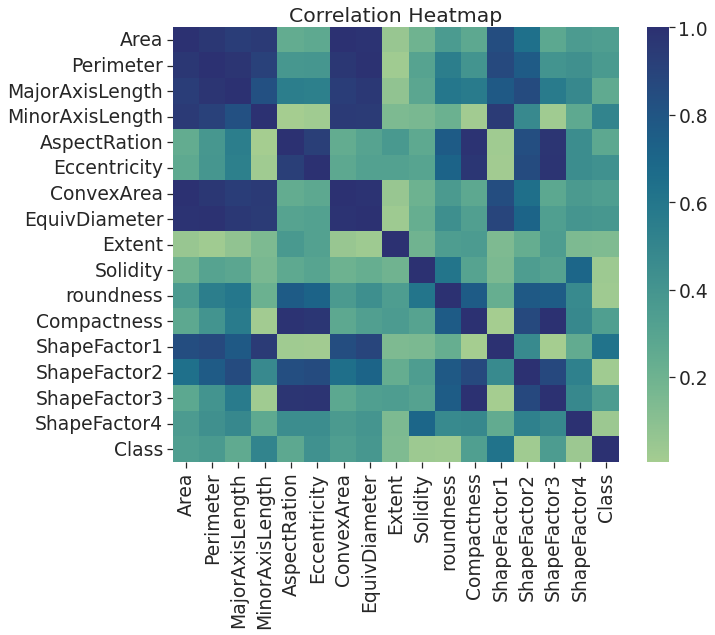

In [7]:
# build an heatmap showing attributes correlation


sns.set(font_scale=1.7)
sns.set_style("ticks")
plot, ax = plt.subplots(1,1, figsize=(10,8))
plot = sns.heatmap(abs(dataset.corr()),cmap="crest")
plot.set(title="Correlation Heatmap")

In [8]:
#drop attributes to avoid collinearity

dataset = dataset.drop(columns=['Area', 'Perimeter', 'ConvexArea', 'EquivDiameter', 'Compactness', 'AspectRation'])
dataset

,MajorAxisLength,MinorAxisLength,Eccentricity,Extent,Solidity,roundness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,208.178117,173.888747,0.549812,0.763923,0.988856,0.958027,0.007332,0.003147,0.834222,0.998724,0
1,200.524796,182.734419,0.411785,0.783968,0.984986,0.887034,0.006979,0.003564,0.909851,0.998430,0
2,212.826130,175.931143,0.562727,0.778113,0.989559,0.947849,0.007244,0.003048,0.825871,0.999066,0
3,210.557999,182.516516,0.498616,0.782681,0.976696,0.903936,0.007017,0.003215,0.861794,0.994199,0
4,201.847882,190.279279,0.333680,0.773098,0.990893,0.984877,0.006697,0.003665,0.941900,0.999166,0
...,...,...,...,...,...,...,...,...,...,...,...
13606,288.721612,185.944705,0.765002,0.714574,0.990331,0.916603,0.006858,0.001749,0.642988,0.998385,6
13607,281.576392,190.713136,0.735702,0.799943,0.990752,0.922015,0.006688,0.001886,0.676099,0.998219,6
13608,281.539928,191.187979,0.734065,0.729932,0.989899,0.918424,0.006681,0.001888,0.676884,0.996767,6
13609,283.382636,190.275731,0.741055,0.705389,0.987813,0.907906,0.006724,0.001852,0.668237,0.995222,6


[Text(0.5, 1.0, 'Correlation Heatmap')]

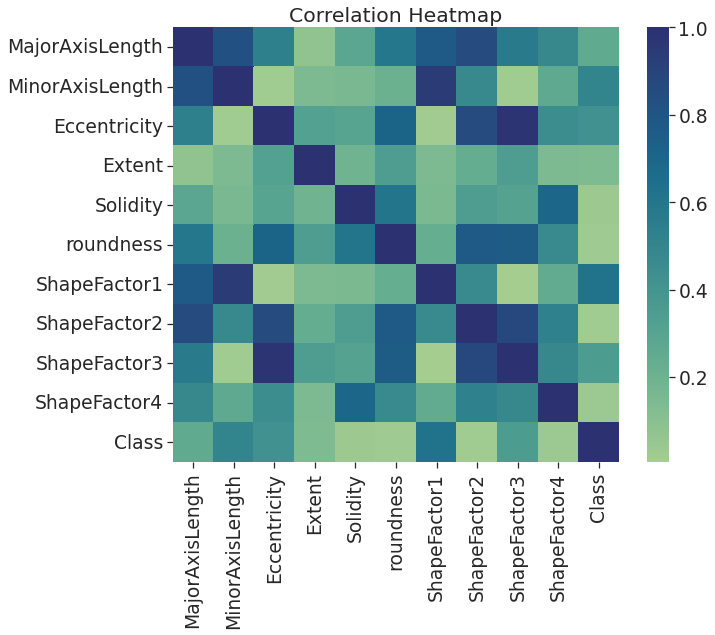

In [9]:
# build an heatmap showing attributes correlation


sns.set(font_scale=1.7)
sns.set_style("ticks")
plot, ax = plt.subplots(1,1, figsize=(10,8))
plot = sns.heatmap(abs(dataset.corr()),cmap="crest")
plot.set(title="Correlation Heatmap")

## Dataset split

In [10]:
attributes = dataset.columns.to_list()
attributes = attributes[:-1]
attributes

['MajorAxisLength',
 'MinorAxisLength',
 'Eccentricity',
 'Extent',
 'Solidity',
 'roundness',
 'ShapeFactor1',
 'ShapeFactor2',
 'ShapeFactor3',
 'ShapeFactor4']

In [11]:
# split in training and test sets using sklearn train_test_split

dataset_train, dataset_test = train_test_split(dataset, test_size=0.15, random_state=seed)
print(dataset_train.info())
print(dataset_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11511 entries, 7596 to 7336
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MajorAxisLength  11511 non-null  float64
 1   MinorAxisLength  11511 non-null  float64
 2   Eccentricity     11511 non-null  float64
 3   Extent           11511 non-null  float64
 4   Solidity         11511 non-null  float64
 5   roundness        11511 non-null  float64
 6   ShapeFactor1     11511 non-null  float64
 7   ShapeFactor2     11511 non-null  float64
 8   ShapeFactor3     11511 non-null  float64
 9   ShapeFactor4     11511 non-null  float64
 10  Class            11511 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 1.1 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2032 entries, 811 to 573
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MajorAxisLength  2032 non-null

## Outliers removal

In [12]:
# define a percentile-based outliers remover

def outlier_remover(df, attributes):
    df_t = df

    for a in attributes:

      q_low = df_t[a].quantile(0.01)
      q_hi  = df_t[a].quantile(0.99)
      
      df_t = df_t.drop(df_t[((df_t[a] > q_hi) | (df_t[a] < q_low))].index)

    return df_t

In [13]:
# remove outliers

df = []
print(dataset_train.info())

for c in range(7):
  df.append(outlier_remover(dataset_train[dataset_train['Class'] == c], attributes))

train_dataset = pd.concat(df)
train_dataset = train_dataset.reset_index(drop=True)
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11511 entries, 7596 to 7336
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MajorAxisLength  11511 non-null  float64
 1   MinorAxisLength  11511 non-null  float64
 2   Eccentricity     11511 non-null  float64
 3   Extent           11511 non-null  float64
 4   Solidity         11511 non-null  float64
 5   roundness        11511 non-null  float64
 6   ShapeFactor1     11511 non-null  float64
 7   ShapeFactor2     11511 non-null  float64
 8   ShapeFactor3     11511 non-null  float64
 9   ShapeFactor4     11511 non-null  float64
 10  Class            11511 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 1.1 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9343 entries, 0 to 9342
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MajorAxisLength  9343 non-null 

## Attributes scaling

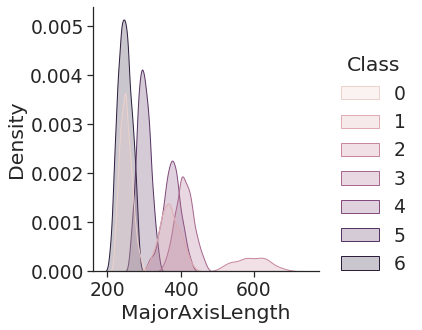

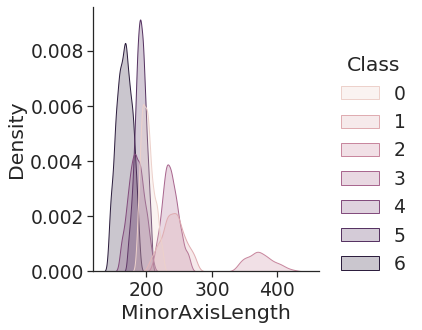

In [14]:
# plot attributes density before scaling

sns.displot(train_dataset, x="MajorAxisLength", hue='Class', kind="kde", fill=True)
sns.displot(train_dataset, x="Solidity", hue='Class', kind="kde", fill=True)

In [15]:
# separate targets from data

train_targets = train_dataset['Class']
df = train_dataset.drop(columns=['Class'])
test_targets = dataset_test['Class']
test_dataset = dataset_test.drop(columns=['Class'])

In [16]:
# scale the attributes with a standard scaler

scaler = preprocessing.StandardScaler()
scaled_train_dataset = scaler.fit_transform(df)
scaled_test_dataset = scaler.transform(test_dataset)
scaled_train_dataset = pd.DataFrame(scaled_train_dataset, columns=attributes)
scaled_test_dataset = pd.DataFrame(scaled_test_dataset, columns=attributes)

# save the mean vector and the std vector

scaling_mean = scaler.mean_
scaling_std = scaler.scale_

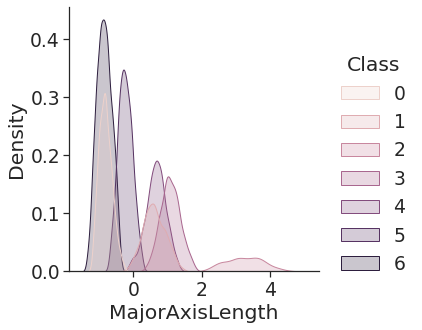

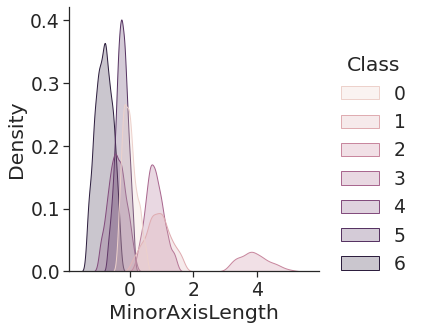

In [17]:
# plot attributes density after scaling

df = scaled_train_dataset.join(train_targets)
sns.displot(df, x="MajorAxisLength", hue='Class', kind="kde", fill=True)
sns.displot(df, x="Solidity", hue='Class', kind="kde", fill=True)

## Balance classes

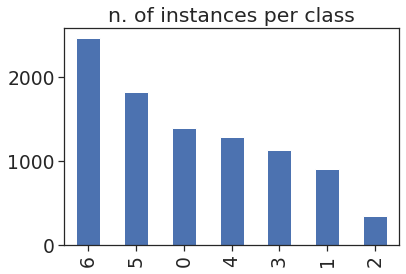

In [18]:
# check classes balance

class_df = df["Class"]
count = class_df.value_counts()
count.plot.bar(title = "n. of instances per class")

In [19]:
# define sampling dictionaries

over_strategy = {
  3: 1284,
  1: 1284,
  2: 1284
}

under_strategy = {
  6: 1392,
  5: 1392,
}

In [20]:
# summarize class distribution
print(Counter(train_targets))
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy=over_strategy, random_state=seed)
# fit and apply the transform
oversampled_train_dataset, oversampled_train_targets = oversample.fit_resample(scaled_train_dataset, train_targets)
# summarize class distribution
Counter(oversampled_train_targets)

Counter({6: 2461, 5: 1820, 0: 1392, 4: 1284, 3: 1131, 1: 908, 2: 347})


Counter({0: 1392, 1: 1284, 2: 1284, 3: 1284, 4: 1284, 5: 1820, 6: 2461})

In [21]:

print(Counter(oversampled_train_targets))
undersample = RandomUnderSampler(sampling_strategy=under_strategy, random_state=seed)
resampled_train_dataset, resampled_train_targets = undersample.fit_resample(oversampled_train_dataset, oversampled_train_targets)
print(Counter(resampled_train_targets))

Counter({6: 2461, 5: 1820, 0: 1392, 1: 1284, 2: 1284, 3: 1284, 4: 1284})
Counter({0: 1392, 5: 1392, 6: 1392, 1: 1284, 2: 1284, 3: 1284, 4: 1284})


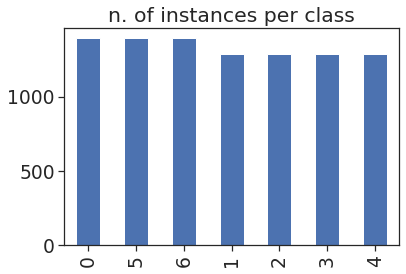

In [22]:
# check classes balance

df = resampled_train_dataset.join(resampled_train_targets)

class_df = df["Class"]
count = class_df.value_counts()
count.plot.bar(title = "n. of instances per class")

# RESULTING DATASETS
**Unmodified**: 


```
dataset_train, dataset_test
```


**Scaled and without outliers**: 

```
scaled_train_dataset, scaled_test_dataset
```

**Resampled (after scaling and outliers removal)**:

```
resampled_train_dataset, resampled_train_targets, scaled_test_dataset, test_targets
```

In [23]:
print(resampled_train_dataset.info())
print(resampled_train_targets)
print(scaled_test_dataset.info())
print(test_targets)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9312 entries, 0 to 9311
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MajorAxisLength  9312 non-null   float64
 1   MinorAxisLength  9312 non-null   float64
 2   Eccentricity     9312 non-null   float64
 3   Extent           9312 non-null   float64
 4   Solidity         9312 non-null   float64
 5   roundness        9312 non-null   float64
 6   ShapeFactor1     9312 non-null   float64
 7   ShapeFactor2     9312 non-null   float64
 8   ShapeFactor3     9312 non-null   float64
 9   ShapeFactor4     9312 non-null   float64
dtypes: float64(10)
memory usage: 727.6 KB
None
0       0
1       0
2       0
3       0
4       0
       ..
9307    6
9308    6
9309    6
9310    6
9311    6
Name: Class, Length: 9312, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2032 entries, 0 to 2031
Data columns (total 10 columns):
 #   Column           Non-Null Count

# MODELS

## Random Forest Classifier

In [ ]:
# define the parameters to be tested

n_estimators = [100, 200, 300]
max_features = ['log2', 'sqrt', 0.33, 0.6, 0.8]
max_depth = [5, 10, 15, 20]
min_samples_split = [2, 4, 6, 8]
criterion = ['gini', 'entropy']

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'criterion': criterion,
               'bootstrap': [True, False]}

# create the grid and fit it, printing best score and parameters

model = GridSearchCV(RandomForestClassifier(), param_grid, scoring="accuracy", cv=5, verbose=3)
model.fit(resampled_train_dataset, resampled_train_targets)
print("Best validation score and parameters: ")
print(f"Accuracy (Validation): {model.best_score_}")
print(f"Parameters: {model.best_params_}\n")

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.974 total time=   1.5s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.979 total time=   1.5s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.977 total time=   1.5s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.974 total time=   1.5s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.980 total time=   1.5s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_split=4, n_estimators=200;, score=0.975 total time=   3.0s
[CV 2/5] END bootstrap=True, criterion=gini

Best validation score and parameters: 

Accuracy (Validation): 0.9793816263686592

Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 20 'max_features': 'log2', 'min_samples_split': 4, 'n_estimators': 300}

Accuracy (test): 0.9040354330708661

F1 score (test): 0.9038383831001464

In [ ]:
# use best configuration to make predictions on test set, printing relevant metrics

res = model.predict(scaled_test_dataset)
print("Accuracy (test): " + str(metrics.accuracy_score(test_targets, res)))
print("F1 score (test): " + str(metrics.f1_score(test_targets, res, average='weighted')))

Accuracy (test): 0.9030511811023622
F1 score (test): 0.9029478848129855


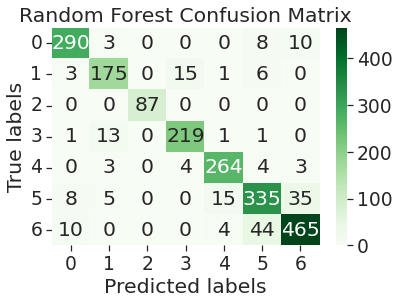

In [ ]:
# plot confusion matrix

cm_rf = metrics.confusion_matrix(test_targets, res)
labels = [i for i in range(7)]

ax = plt.subplot()
sns.heatmap(cm_rf, annot=True, ax = ax, fmt='g', cmap='Greens') 

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Random Forest Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360);

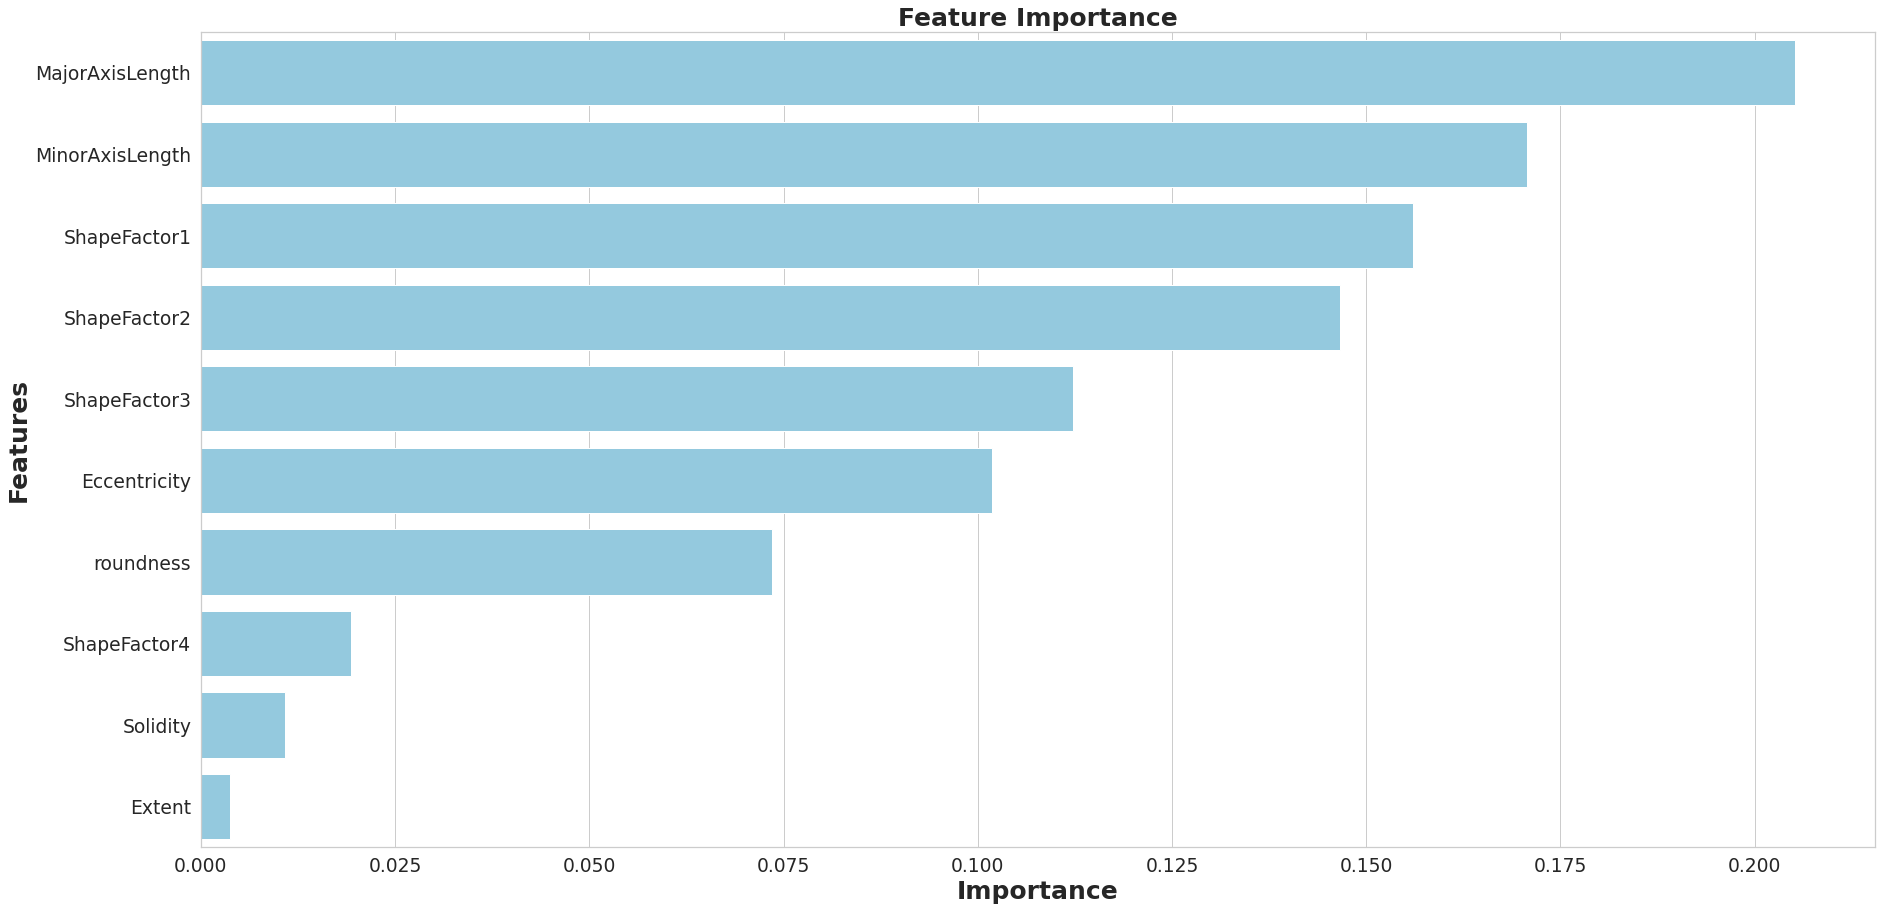

None

,Features,Gini-Importance
0,MajorAxisLength,0.205203
1,MinorAxisLength,0.170647
2,ShapeFactor1,0.156048
3,ShapeFactor2,0.146687
4,ShapeFactor3,0.112258
5,Eccentricity,0.101853
6,roundness,0.073507
7,ShapeFactor4,0.019271
8,Solidity,0.010833
9,Extent,0.003693


In [ ]:
feats = {}
for feature, importance in zip(attributes, model.best_estimator_.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})

importances_red = importances[importances['Gini-Importance']>0]
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances_red['Gini-Importance'], y=importances_red['Features'], data=importances_red, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances_red)

## SVM

In [24]:
# define the parameters to be tested

param_grid = {'C': [0.1, 0.5, 1, 10, 100],
              'gamma': [1, 0.5, 0.25, 0.1, 0.01],
              "kernel": ["linear", "rbf", "poly", "sigmoid"],
              "decision_function_shape" : ["ovr", "ovo"]}

# create the grid and fit it, printing best score and parameters

model = GridSearchCV(SVC(), param_grid, scoring="accuracy", cv=5, verbose=3)
model.fit(resampled_train_dataset, resampled_train_targets)
print("Best validation score and parameters: ")
print(f"Accuracy (Validation): {model.best_score_}")
print(f"Parameters: {model.best_params_}\n")

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV 1/5] END C=0.1, decision_function_shape=ovr, gamma=1, kernel=linear;, score=0.971 total time=   0.5s
[CV 2/5] END C=0.1, decision_function_shape=ovr, gamma=1, kernel=linear;, score=0.974 total time=   0.4s
[CV 3/5] END C=0.1, decision_function_shape=ovr, gamma=1, kernel=linear;, score=0.975 total time=   0.4s
[CV 4/5] END C=0.1, decision_function_shape=ovr, gamma=1, kernel=linear;, score=0.973 total time=   0.8s
[CV 5/5] END C=0.1, decision_function_shape=ovr, gamma=1, kernel=linear;, score=0.974 total time=   0.4s
[CV 1/5] END C=0.1, decision_function_shape=ovr, gamma=1, kernel=rbf;, score=0.970 total time=   3.4s
[CV 2/5] END C=0.1, decision_function_shape=ovr, gamma=1, kernel=rbf;, score=0.970 total time=   2.1s
[CV 3/5] END C=0.1, decision_function_shape=ovr, gamma=1, kernel=rbf;, score=0.974 total time=   2.2s
[CV 4/5] END C=0.1, decision_function_shape=ovr, gamma=1, kernel=rbf;, score=0.969 total time=   2.2s
[CV

Best validation score and parameters: 

Accuracy (Validation): 0.9775562093639897

Parameters: {'C': 100, 'decision_function_shape': 'ovr', 'gamma': 0.1, 'kernel': 'rbf'}

In [25]:
# use best configuration to make predictions on test set, printing relevant metrics

res = model.predict(scaled_test_dataset)
print("Accuracy (test): " + str(metrics.accuracy_score(test_targets, res)))
print("F1 score (test): " + str(metrics.f1_score(test_targets, res, average='weighted')))

Accuracy (test): 0.9202755905511811
F1 score (test): 0.9201241005142521


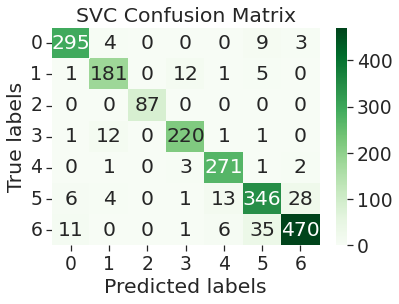

In [26]:
# plot confusion matrix

cm_rf = metrics.confusion_matrix(test_targets, res)
labels = [i for i in range(7)]

ax = plt.subplot()
sns.heatmap(cm_rf, annot=True, ax = ax, fmt='g', cmap='Greens') 

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('SVC Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360);